# Hands-On ML with Scikit-Learn & Tensorflow
## Chapter 4 - Christian Bramwell

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_mldata
import random

### Functions and Classes

### Linear Regression

**The Normal Equation**

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

In [5]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.02914291],
       [ 3.03172771]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.02914291],
       [ 10.09259833]])

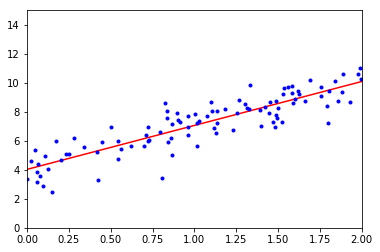

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.02914291]), array([[ 3.03172771]]))

In [11]:
lin_reg.predict(X_new)

array([[  4.02914291],
       [ 10.09259833]])

### Gradient Descent